In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

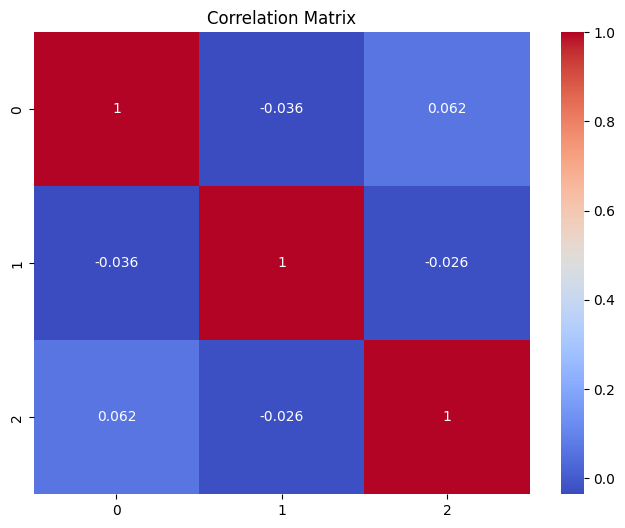

In [2]:
# # 예시 데이터 생성
x1 = np.random.normal(0,1,100) # 변수 x1의 값
x2 = np.random.normal(0,1,100) # 변수 x2의 값
x3 = np.random.normal(0,1,100) # 변수 x3의 값

# 데이터 행렬 생성 
data = np.vstack([x1,x2,x3]).T

# 상관 행렬 계산 
cor_matrix = np.corrcoef(data,rowvar=False)
# 히트맵으로 상관 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# 상관 계수의 절대값이 일정 임계값 이상인 변수 선택
threshold = 0.05

selected_vars=[]
for i in range(cor_matrix.shape[0]):
    for j in range(i+1,cor_matrix.shape[1]):
        if abs(cor_matrix[i,j]) > threshold:
            selected_vars.extend([i,j])
            
print(selected_vars)

[0, 2]


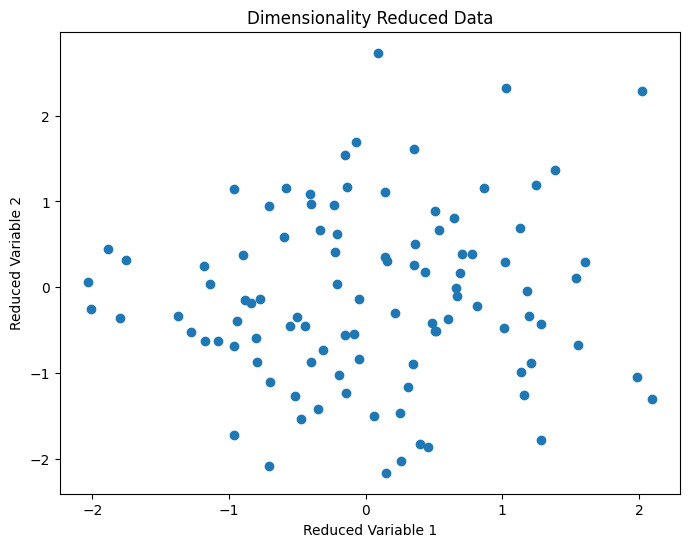

In [7]:
# 선택된 변수들로 차원 축소된 데이터 생성
if selected_vars:
    reduced_data= data[:, list(set(selected_vars))]
    
    # 차원 축소된 데이터 시각화 
    plt.figure(figsize=(8,6))
    plt.scatter(reduced_data[:,0], reduced_data[:,1])
    plt.xlabel('Reduced Variable 1')
    plt.ylabel('Reduced Variable 2')
    plt.title('Dimensionality Reduced Data')
    plt.show()
else:
    print("데이터셋에서 선택된 변수가 없어 차원 축소가 이루어지지 않았음")